In [71]:
import networkx as nx
import pylab as plt
import pandas as pd
# Create blank graph
D=nx.DiGraph()

citations_with_data= pd.read_csv('citations(hep-th)_with_Data.csv')

In [72]:
Authors_seed = pd.read_csv('./authors_seed.csv')
Authors_seed

,Authors,Seed
0,A Shirzad and F Loran,7c7137cb1b7fb32a9ead37fdc3962e908af9066085e18d...
1,A. A. Abrikosov Jr,7c037faf08e96a7155bff4fcca5a3580990376669a4625...
2,"A. A. Andrianov, R. Soldati, L. Sorbo",9844350bf2c78c15f131563eef2bbc8a77e315e42344ec...
3,"A. A. Tseytlin, K. Zarembo",e18d25d3766f2232eb66d7b578f578b03e9d8ff25803a4...
4,"A. B. Bylev, H. J. Pirner",c811fa24c0ea190dc038f61045fcac3153fc8a1cf242f4...
...,...,...
1328,"Zahid Zakir (Institute of Noosphere,Tashkent, ...",1e0edc84b3ebfcad1664c570913ab3a3ba9e9711e98d30...
1329,Zurab Kakushadze and S.-H. Henry Tye,2aa64f1b2947141ed4b8d6af244acd8eb0f977a4003662...
1330,"Zygmunt Lalak (ITP Warsaw), Andre' Lukas (UPen...",3936c3d8a3f61e30447a9a978f140b1e20dd9e8ed857b4...
1331,Zygmunt Lalak and Steven Thomas,4b3b7ab38145321ccd63fab25f95f674b0fac19ca0b62e...


In [73]:
for i in range(len(citations_with_data)):
    D.add_weighted_edges_from([(str(citations_with_data.iloc[i]['FromNodeId']),str(citations_with_data.iloc[i]['ToNodeId']),1)])
    
# Plot graph
#nx.draw(D, with_labels=False)
#plt.show()

In [81]:
D_df = nx.to_pandas_edgelist(D)
D_df

,source,target,weight
0,9503222,9310202,1
1,9312207,9312202,1
2,9910201,9312206,1
3,9910201,9811231,1
4,9712226,9312206,1
...,...,...,...
1972,9912287,9912233,1
1973,9911213,9910253,1
1974,9911254,9911219,1
1975,9912235,9912219,1


In [37]:
#FROM GRAPH TO ADJ MAT

AM_sparse =nx.adjacency_matrix(D) #list storage type

AM_matrix = AM.todense()
AM_matrix_df = pd.DataFrame(AM_matrix)
AM_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


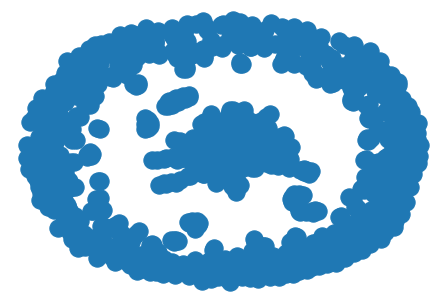

In [40]:
#FROM ADJ MAT TO GRAPH
D_2 = nx.from_numpy_matrix(AM_matrix, create_using = nx.MultiGraph())
nx.draw(D_2, with_labels=False)
plt.show()

In [16]:
import numpy as np
np.shape(AM_matrix) #ho 1066 nodi

(1066, 1066)

In [59]:
# Print page rank for each pages
PR = nx.pagerank(D)

PR_df = pd.DataFrame.from_dict(PR,orient='index')

PR_df

,0
9503222,0.000211
9310202,0.000391
9312207,0.000480
9312202,0.000619
9910201,0.000271
...,...
9911207,0.000271
9911254,0.000211
9911219,0.000391
9912235,0.000211


In [60]:
PR_df[0].sum() #ho la prob di ogni nodo

0.9999999999999998

In [61]:
PR_df[0].max()

0.017438148870543617

In [85]:
PR_df = pd.read_csv('./PR_df.csv')
PR_df.sort_values(by='0',inplace = True, ascending=False)
PR_df.reset_index(drop = True, inplace = True)

<AxesSubplot:>

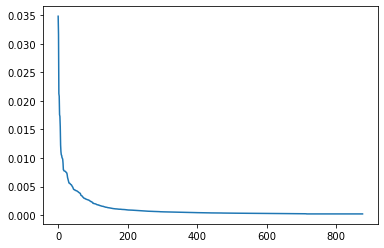

In [86]:
PR_df['0'].plot()

In [87]:
PR_df

,0
0,0.034836
1,0.031649
2,0.021271
3,0.020822
4,0.017604
...,...
872,0.000205
873,0.000205
874,0.000205
875,0.000205


In [88]:
PR_df['0'].sum()

0.9999999999999551